In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [39]:
# Let's pull the candidates info 
senate_cand = pd.read_csv("senate.csv")

total_winners = senate_cand[senate_cand["GE WINNER INDICATOR"] == 1].count()[0]

senate_cand.head()
# https://classic.fec.gov/finance/disclosure/metadata/DataDictionaryCandidateMaster.shtml

,Cand_Id,Cand_Incumbent_Challenger_Open_Seat,Cand_Name,Cand_Office,Cand_Office_St,Cand_Party_Affiliation,Cand_State,GE WINNER INDICATOR,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,Total_Disbursement,Total_Receipt,year
0,S6AK00078,CHALLENGER,"CUDDY, DAVID W",S,AK,REP,AK,0,31261.0,260.0,0.0,862663.0,862661.0,2008
1,S8AK00074,CHALLENGER,"CALDERO, ROCKY CHRISTOPHER",S,AK,DEM,AK,0,31622.0,0.0,0.0,25891.0,32004.0,2008
2,S8AK00082,CHALLENGER,"METCALFE, RAY",S,AK,DEM,AK,0,30267.0,0.0,0.0,30562.0,30309.0,2008
3,S8AK00108,CHALLENGER,"SIKMA, RODERIC H 'RICK'",S,AK,REP,AK,0,4746.0,0.0,0.0,12203.0,11996.0,2008
4,S8AK00124,CHALLENGER,"VICKERS, RAYMOND B VIC",S,AK,REP,AK,0,10215.0,0.0,0.0,1010617.0,1055221.0,2008


In [40]:
open_cand = senate_cand[senate_cand['Cand_Incumbent_Challenger_Open_Seat'] == "OPEN"]
winning_open = open_cand[open_cand["GE WINNER INDICATOR"] == 1] 
prob_open = winning_open.count()[0]/open_cand.count()[0]
winning_open.count()[0]

28

In [41]:
incumbents = senate_cand[senate_cand['Cand_Incumbent_Challenger_Open_Seat'] == "INCUMBENT"]
winning_incumbents = incumbents[incumbents["GE WINNER INDICATOR"] == 1] 
prob_incumbents = winning_incumbents.count()[0]/(total_winners - winning_open.count()[0])
winning_incumbents.count()[0]

124

In [42]:
challengers = senate_cand[senate_cand['Cand_Incumbent_Challenger_Open_Seat'] == "CHALLENGER"]
winning_challengers = challengers[challengers["GE WINNER INDICATOR"] == 1] 
prob_challengers = winning_challengers.count()[0]/(total_winners - winning_open.count()[0])
winning_challengers.count()[0]

17

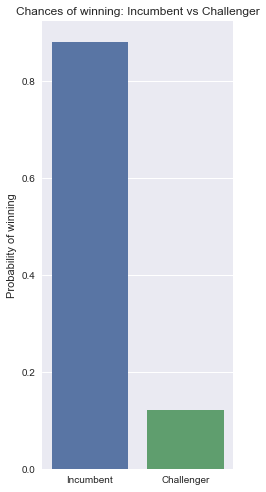

In [43]:
sns.set()
plot = pd.DataFrame({"Candidate Status":["Incumbent","Challenger"],"Probability of winning":[prob_incumbents,prob_challengers]})
g = sns.factorplot(x="Candidate Status", y="Probability of winning",data=plot, kind='bar',size=7, aspect=0.5)
for ax in g.axes.flatten():
    ax.set_xlabel("")
    ax.set_title('Chances of winning: Incumbent vs Challenger')
    g.savefig("incumbent.jpg",dpi=400)


In [44]:
print(prob_incumbents)
print(prob_challengers)

0.8794326241134752
0.12056737588652482
